###Cleaning and Importing

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification



In [2]:
df = pd.read_csv('insurance_data.csv')

In [3]:
''''

My target variable is Claim Status which is categorical that can be converted into binary variables

Since target variable  is categorical binary

I will use Classification instead of Regression

Logistic Regression(Linear) and Classification Tree(non linear) models are executed

'''''

"'\n\nMy target variable is Claim Status which is categorical that can be converted into binary variables\n\nSince target variable  is categorical binary\n\nI will use Classification instead of Regression\n\nLogistic Regression(Linear) and Classification Tree(non linear) models are executed\n\n"

In [4]:
#choose data for supervised learning
selected_columns = ['PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'INSURANCE_TYPE', 'AGE',
                    'RISK_SEGMENTATION', 'INCIDENT_SEVERITY', 'CLAIM_STATUS', 'ANY_INJURY',
                    'MARITAL_STATUS', 'NO_OF_FAMILY_MEMBERS', 'SOCIAL_CLASS', 'TENURE',
                    'CUSTOMER_EDUCATION_LEVEL', 'INCIDENT_HOUR_OF_THE_DAY']
df = df[selected_columns]
df.head()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,INSURANCE_TYPE,AGE,RISK_SEGMENTATION,INCIDENT_SEVERITY,CLAIM_STATUS,ANY_INJURY,MARITAL_STATUS,NO_OF_FAMILY_MEMBERS,SOCIAL_CLASS,TENURE,CUSTOMER_EDUCATION_LEVEL,INCIDENT_HOUR_OF_THE_DAY
0,157.13,9000,Health,54,L,Major Loss,A,0,Y,3,LI,89,Bachelor,4
1,141.71,26000,Property,61,L,Total Loss,A,1,N,4,MI,80,Bachelor,0
2,157.24,13000,Property,47,L,Total Loss,A,0,N,6,MI,68,PhD,19
3,172.87,16000,Health,36,L,Minor Loss,A,0,Y,7,MI,16,Masters,12
4,88.53,3000,Travel,51,M,Major Loss,A,0,Y,2,HI,16,Masters,18


In [5]:
#get dummies for categorical data
df = pd.get_dummies(df, columns=["INSURANCE_TYPE", "RISK_SEGMENTATION", "INCIDENT_SEVERITY","MARITAL_STATUS",
                                 "SOCIAL_CLASS", "CUSTOMER_EDUCATION_LEVEL"
 ], drop_first=True)


In [6]:
#Convert boolean columns into binary data

boolean_columns = [
    'INSURANCE_TYPE_Life', 'INSURANCE_TYPE_Mobile', 'INSURANCE_TYPE_Motor', 'INSURANCE_TYPE_Property',
    'INSURANCE_TYPE_Travel', 'RISK_SEGMENTATION_L', 'RISK_SEGMENTATION_M',
    'INCIDENT_SEVERITY_Minor Loss', 'INCIDENT_SEVERITY_Total Loss',
    'MARITAL_STATUS_Y', 'SOCIAL_CLASS_LI', 'SOCIAL_CLASS_MI',
    'CUSTOMER_EDUCATION_LEVEL_College', 'CUSTOMER_EDUCATION_LEVEL_High School',
    'CUSTOMER_EDUCATION_LEVEL_MD', 'CUSTOMER_EDUCATION_LEVEL_Masters',
    'CUSTOMER_EDUCATION_LEVEL_PhD' ]

for col in boolean_columns:
      df[col] = df[col].astype(int)


In [7]:
#convert Target variable to binary

df.loc[df.CLAIM_STATUS == 'A', 'CLAIM_STATUS'] = 1
df.loc[df.CLAIM_STATUS == 'D', 'CLAIM_STATUS'] = 0

df['CLAIM_STATUS'] = df['CLAIM_STATUS'].astype(int)


In [8]:
#scale numerical features
scaler = StandardScaler()
numerical_features = ['PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'AGE', 'NO_OF_FAMILY_MEMBERS', 'TENURE', 'INCIDENT_HOUR_OF_THE_DAY' ]
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [9]:
# Define features and target
X = df.drop('CLAIM_STATUS', axis=1)
y = df['CLAIM_STATUS']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
df['CLAIM_STATUS'].value_counts()

#imbalance between 1 and 0 data
#try oversample the training data

,count
CLAIM_STATUS,
1,9497
0,503


## Logistic Regression

In [33]:
#overfits training data to counter the imbalance in data
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)


In [44]:
from imblearn.over_sampling import SMOTE


In [47]:

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [57]:
#using class weight to balance majority(1) and minority(0)
model = LogisticRegression(max_iter=1000, random_state= 1, class_weight= 'balanced')
model.fit(X_train, y_train)


print("Training Score:",model.score(X_train, y_train))
print("Testing Score:",model.score(X_test, y_test))


Training Score: 0.5573856898142048
Testing Score: 0.508


In [49]:
pred_log = model.predict_proba(X_test)
preds_log = np.array([i[1] for i in pred_log])

<ipython-input-50-8acc7785e7a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preds_log[y_test==0], hist=False, kde=True, label="D")
<ipython-input-50-8acc7785e7a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preds_log[y_test==1], hist=False, kde=True, label="A")


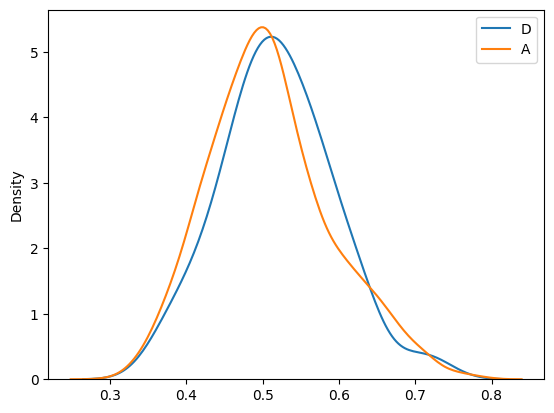

In [50]:
sns.distplot(preds_log[y_test==0], hist=False, kde=True, label="D")
sns.distplot(preds_log[y_test==1], hist=False, kde=True, label="A")
plt.legend()
plt.show()

In [51]:
##There is significant overlap between the two lines,
## it indicates that the model struggles to separate the classes effectively, which could lead to misclassification.

Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = pd.DataFrame(model.predict_proba(X_test))
print(y_pred_proba.head())

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cm = pd.DataFrame(cm, columns=["Predicted 0", "Predicted 1"], index=["True 0", "True 1"])

print(cm)

# Precision
precision = cm.loc["True 1", "Predicted 1"] / cm["Predicted 1"].sum()

# Recall
recall = cm.loc["True 1", "Predicted 1"] / cm.loc["True 1"].sum()

# Print Precision and Recall as percentages
print("Recall: ", str(round(100 * recall, 2)) + "%")
print("Precision: ", str(round(100 * precision, 2)) + "%")


          0         1
0  0.534376  0.465624
1  0.481303  0.518697
2  0.414673  0.585327
3  0.441858  0.558142
4  0.585197  0.414803
        Predicted 0  Predicted 1
True 0           36           56
True 1          928          980
Recall:  51.36%
Precision:  94.59%


In [53]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f1)
#moderate balance between recall and precision

0.6657608695652174


ROC

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.452


In [55]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

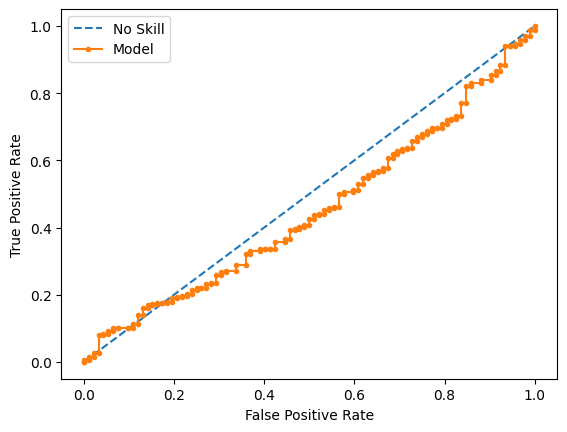

In [56]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Classification Tree

In [26]:
dt_model = DecisionTreeClassifier(min_samples_split=1000, random_state=420, class_weight = 'balanced')
dt_model.fit(X_train, y_train)


print("Training Score:",dt_model.score(X_train, y_train))
print("Testing Score:",dt_model.score(X_test, y_test))

Training Score: 0.45075
Testing Score: 0.433


In [27]:
dt_y_pred = dt_model.predict(X_test)
dt_preds = dt_model.predict_proba(X_test)[:, 1]

<ipython-input-28-ea8a2700bf83>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_preds[y_test==0], hist=False, kde=True, label="D")
<ipython-input-28-ea8a2700bf83>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_preds[y_test==1], hist=False, kde=True, label="A")


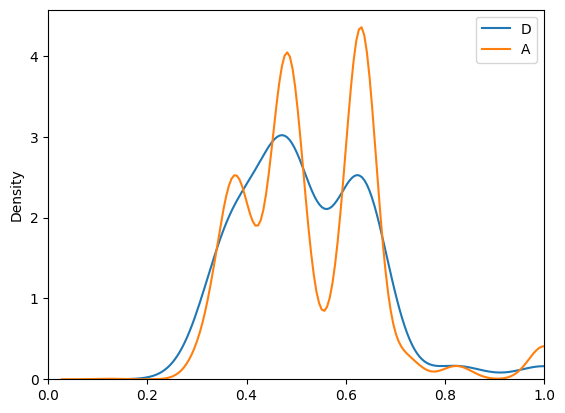

In [28]:
import seaborn as sns

sns.distplot(dt_preds[y_test==0], hist=False, kde=True, label="D")
sns.distplot(dt_preds[y_test==1], hist=False, kde=True, label="A")
plt.legend()
plt.xlim(0, 1)
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix


cm_dt = confusion_matrix(y_test, dt_y_pred)
cm_dt_df = pd.DataFrame(cm_dt, columns=["Predicted 0", "Predicted 1"], index=["True 0", "True 1"])

precision_dt = cm_dt_df.loc["True 1", "Predicted 1"] / cm_dt_df["Predicted 1"].sum()
recall_dt = cm_dt_df.loc["True 1", "Predicted 1"] / cm_dt_df.loc["True 1"].sum()

print("Recall: ", str(round(100*recall_dt, 2))+"%")
print("Precision: ", str(round(100*precision_dt, 2))+"%")


Recall:  42.4%
Precision:  95.85%


In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
dt_probs = dt_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.517


In [31]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

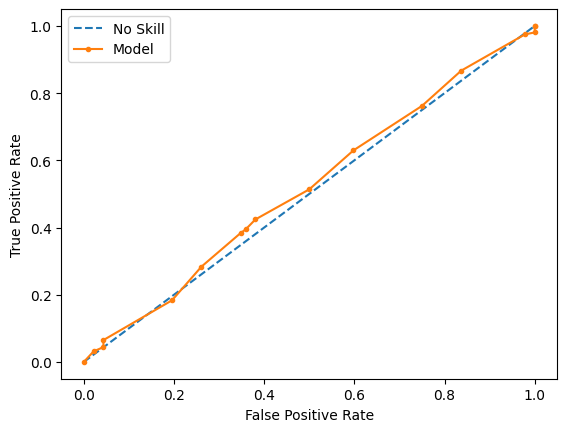

In [32]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()